In [1]:
from itertools import count

import pandas as pd
from pandas import Index

pd.__version__

'2.2.2'

Datei einlesen

In [3]:
df = pd.read_excel('ZA8732_v1-0-0.xlsx')
question_regex_filter = r'[f]\d+_\d+'
questions = df.filter(regex=question_regex_filter, axis="columns")
personal_data_regex_filter=r'[s]\d'
personal_data = df.filter(regex=personal_data_regex_filter, axis="columns")

col_bundesland_index = 's3'
col_bundesland = personal_data[col_bundesland_index]

df

,za_nr,version,doi,lfd,f1_1,f1_2,f1_3,f1_4,f2_1,f2_2,...,s2r,s3,s3b,s4,s5.1R,s5.2R,s6,s6b,s7,gewicht
0,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3049125,stark,weniger stark,weniger stark,stark,eher groß,sehr groß,...,35 bis 54 Jahre,Bayern,,100.000 und mehr Einwohner,3 Pernsonen,1 Kind,Mittlere (Realschulabschluss/Polytechnische Ob...,,Linke,2.095754
1,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3057581,stark,stark,stark,sehr stark,eher groß,eher gering,...,65 Jahre und älter,Niedersachsen,,50.000 bis unter 100.000 Einwohner,1 Pernson,Keine,Hochschulstudium,,keine,0.270366
2,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3118320,stark,stark,stark,stark,eher groß,sehr groß,...,55 bis 64 Jahre,Baden Württemberg,,5.000 bis unter 20.000 Einwohner,1 Pernson,Keine,Mittlere (Realschulabschluss/Polytechnische Ob...,,Grüne,1.496320
3,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3001637,gar nicht,sehr stark,gar nicht,gar nicht,eher gering,eher gering,...,65 Jahre und älter,Schleswig Holstein,,20.000 bis unter 50.000 Einwohner,2 Pernsonen,Keine,Mittlere (Realschulabschluss/Polytechnische Ob...,,SPD,0.954376
4,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3122338,stark,stark,stark,stark,eher gering,sehr groß,...,55 bis 64 Jahre,Bayern,,unter 5.000 Einwohner,2 Pernsonen,Keine,Hauptschulabschluss (Polytechnische Oberschule...,,AfD,1.164019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3126345,stark,stark,stark,sehr stark,eher groß,sehr groß,...,65 Jahre und älter,Sachsen Anhalt,,20.000 bis unter 50.000 Einwohner,1 Pernson,Keine,Hochschulstudium,,keine,0.225284
1497,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3124961,stark,stark,stark,stark,eher groß,sehr groß,...,65 Jahre und älter,Nordrhein Westfalen,,5.000 bis unter 20.000 Einwohner,2 Pernsonen,Keine,Abitur (Fachhochschulreife/Fachoberschule),,keine,0.270366
1498,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3124308,stark,sehr stark,gar nicht,Weiß nicht/ Keine Angabe,eher groß,sehr groß,...,55 bis 64 Jahre,Hamburg,,100.000 und mehr Einwohner,2 Pernsonen,Keine,Hochschulstudium,,keine,0.390425
1499,8732,1.0.0 (2024-07-11),doi:10.4232/1.14306,3123889,stark,stark,sehr stark,stark,eher gering,sehr groß,...,25 bis 34 Jahre,Niedersachsen,,unter 5.000 Einwohner,5 Pernsonen,Keine,Mittlere (Realschulabschluss/Polytechnische Ob...,,Grüne,2.095754


## Define order of answers (all answers in one)
Simply add answers to this array

In [5]:
answers_ordered = [
    "Weiß nicht/ Keine Angabe",
    "gar nicht",
    "weniger stark",
    "stark",
    "sehr stark",
    "die Nachteile überwiegen",
    "Vor- und Nachteile halten sich die Waage",
    "die Vorteile überwiegen",
    "in die falsche Richtung",
    "in die richtige Richtung",  
    "mischt sich zu viel ein",
    "mischt sich nicht zu viel ein",
    "wieder stärker allein handeln, Zuständigkeiten von der EU zurückholen",
    "nichts Wesentliches ändern",
    "Zusammenarbeit vertiefen, weiter Zuständigkeiten an die EU abgeben"
];

In [6]:
questions.columns

Index(['f1_1', 'f1_2', 'f1_3', 'f1_4', 'f2_1', 'f2_2', 'f2_3', 'f2_4', 'f2_5',
       'f2_6', 'f6_1', 'f6_2', 'f6_3', 'f6_4', 'f6_5', 'f6_6', 'f6_7', 'f6_8',
       'f6_9', 'f6_10', 'f7_1', 'f7_2', 'f7_3', 'f7_4', 'f7_5', 'f7_6', 'f7_7',
       'f7_8', 'f7_9', 'f7_10', 'f7_11', 'f7_12', 'f7_13', 'f10_1', 'f10_2',
       'f10_3', 'f10_4', 'f10_5', 'f11_1', 'f11_2', 'f11_3', 'f11_4', 'f11_5',
       'f15_1', 'f15_2', 'f15_3', 'f15_4', 'f15_5', 'f15_6', 'f16_1', 'f16_2',
       'f16_3', 'f16_4', 'f16_5', 'f16_6', 'f17_1', 'f17_2', 'f17_3', 'f17_4',
       'f17_5', 'f17_6', 'f17_7', 'f17_8', 'f18_1', 'f18_2', 'f18_3', 'f18_4',
       'f21_1', 'f21_2', 'f21_3', 'f21_4', 'f21_5'],
      dtype='object')

In [7]:
question_selection = 'f_x'

names_germany_west = [
    'Hamburg',
    "Schleswig Holstein",
    "Nordrhein Westfalen",
    "Bayern",
    "Baden Württemberg",
    "Niedersachsen",
    "Hessen",
    "Rheinland Pfalz",
    "Bremen",
    "Saarland"]
names_germany_east = ["Berlin", "Sachsen", "Thüringen", "Bandenburg", "Mecklenburg Vorpommern", "Sachsen Anhalt"]
names_germany_west.sort()
names_germany_east.sort()

bundeslander_values = col_bundesland.value_counts()
question_country_selector = 'Hamburg'

# Prepare dataframe for specific answer

In [9]:
country_question_df = df[[col_bundesland_index, question_selection]]
df_west = country_question_df.loc[df[col_bundesland_index].isin(names_germany_west)]
df_east = country_question_df.loc[df[col_bundesland_index].isin(names_germany_east)]

value_counts_series = {'All': country_question_df[question_selection].value_counts(), 'West': df_west[question_selection].value_counts(), 'East': df_east[question_selection].value_counts()}
for bun in [*names_germany_west, *names_germany_east]:
    value_counts_series[bun] = country_question_df.loc[df[col_bundesland_index] == bun][question_selection].value_counts()

answers_df = pd.DataFrame(value_counts_series)
sorted_labels = [label for label in answers_ordered if label in answers_df.index]
sorted_labels = sorted_labels + [label for label in answers_df.index if label not in sorted_labels]
answers_df = answers_df.reindex(sorted_labels)
answers_df = answers_df.fillna(0).astype(int) # Sort based on ordered list

display(sorted_labels)
display(answers_df.loc[:,question_country_selector])
display(answers_df)


['Weiß nicht/ Keine Angabe',
 'wieder stärker allein handeln, Zuständigkeiten von der EU zurückholen',
 'nichts Wesentliches ändern',
 'Zusammenarbeit vertiefen, weiter Zuständigkeiten an die EU abgeben']

f14
Weiß nicht/ Keine Angabe                                                  1
wieder stärker allein handeln, Zuständigkeiten von der EU zurückholen    24
nichts Wesentliches ändern                                               14
Zusammenarbeit vertiefen, weiter Zuständigkeiten an die EU abgeben       40
Name: Hamburg, dtype: int32

,All,West,East,Baden Württemberg,Bayern,Bremen,Hamburg,Hessen,Niedersachsen,Nordrhein Westfalen,Rheinland Pfalz,Saarland,Schleswig Holstein,Bandenburg,Berlin,Mecklenburg Vorpommern,Sachsen,Sachsen Anhalt,Thüringen
f14,,,,,,,,,,,,,,,,,,,
Weiß nicht/ Keine Angabe,37,25,12,1,3,1,1,2,4,11,0,0,2,2,4,2,2,1,1
"wieder stärker allein handeln, Zuständigkeiten von der EU zurückholen",434,297,137,37,61,6,24,30,42,64,16,3,14,19,27,15,42,17,17
nichts Wesentliches ändern,259,204,55,36,46,4,14,26,21,34,8,8,7,4,17,3,17,4,10
"Zusammenarbeit vertiefen, weiter Zuständigkeiten an die EU abgeben",771,586,185,79,98,9,40,66,68,159,29,7,31,27,52,27,39,14,26


<function matplotlib.pyplot.show(close=None, block=None)>

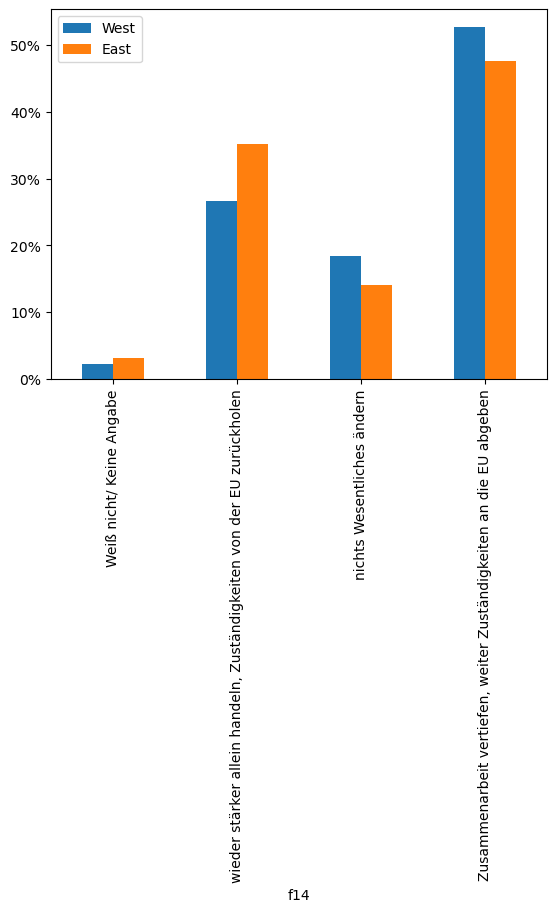

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

percentage_df = answers_df.loc[:, ['West', 'East']].apply(lambda x: x*100/sum(x), axis=0)

percentage_df.plot(kind='bar', stacked=False)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show